# **1. PERKENALAN**

Nama    : Al Izhar Iqrami

Batch   : 011

GC      : 4

**QUERY MEMPEROLEH DATASET**

----

select *

from `ftds-hacktiv8-project.phase1_assignments.credit-card-information`

where mod(CUST_ID,2) <>0

**GAMBARAN DATASET**

----

`Cusd_Id`	: Identifikasi Pemegang Kartu Kredit

`Balance` : Jumlah saldo yang tersisa untuk melakukan pembelian

`Balance_Frequency` : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)

`Purchases` : Jumlah pembelian yang dilakukan dari akun

`Oneoff_Purchases` : Jumlah pembelian maksimum dilakukan dalam sekali jalan

`Installments_Purchases` : Jumlah pembelian dilakukan secara angsuran

`Cash_Advance` : Uang tunai di muka yang diberikan oleh pengguna

`Purchases_Frequency` : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)

`Oneoff_Purchases_Frequency` : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)

`Purchases_Installments_Frequency` : Seberapa sering pembelian secara mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)

`Cash_Advance_Frequency` : Seberapa sering uang tunai di muka dibayarkan

`Cash_Advance_Trx` : Jumlah Transaksi yang dilakukan dengan 'Cash in Advanced'

`Purchases_Trx` : Jumlah transaksi pembelian yang dilakukan

`Credit_Limit` : Batas Kartu Kredit untuk pengguna

`Payments` : Jumlah Pembayaran yang dilakukan oleh pengguna

`Minimum_Payments` : Jumlah minimum pembayaran yang dilakukan oleh pengguna

`Prc_Full_Payments` : Persentase pembayaran penuh yang dibayarkan oleh pengguna

`Tenure` : Jangka waktu layanan kartu kredit untuk pengguna

----

# **2. IMPORT LIBRARY**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
import pickle 
import warnings
import os

warnings.filterwarnings('ignore')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import colors
from matplotlib.colors import ListedColormap

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Melakuakn import library yang berguna untuk membatu memecahkan permasalahan yang diperolah pada saat melakuakan analisis data

# **3. DATA LOADING**

In [2]:
df = pd.read_csv('credit-card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [3]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,2345,9629.808851,1.0,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


## Check Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Terdapat data yang null pada kolom Minimum Payments. Untuk proses analisis lebih lanjut akan dilakukan pada tahap berikutnya, serta melakuakn analisis lebih lanjut kepada semua tipe kolom

## Copy Dataset

In [5]:
data = df.copy()

Menduplicate data original agar supaya jika terdapat kesalahan pada proses pengolahan data kami dapat dengan mudah memperoleh data original kembali.

## Check Data Duplicate

In [6]:
data.duplicated().sum()

0

Tidak terdapat data yang duplikat pada dataset

## Check Jumlah Baris & Kolom

In [7]:
data.shape

(4475, 18)

Terlihat bahwa kami memiliki 4475 baris dan 18 kolom

# **4. EDA**

## Balance vs Credit Limit

In [8]:
px.scatter(data, x='BALANCE', y="CREDIT_LIMIT", color="PURCHASES_FREQUENCY", title='Balance vs Credit Limit')

Terlihat bahwa semakin besar jumlah saldo untuk pembelian (balance) maka batasan kartu kredit akan semakin meningkat (credit limit)

## Balance vs Purchases

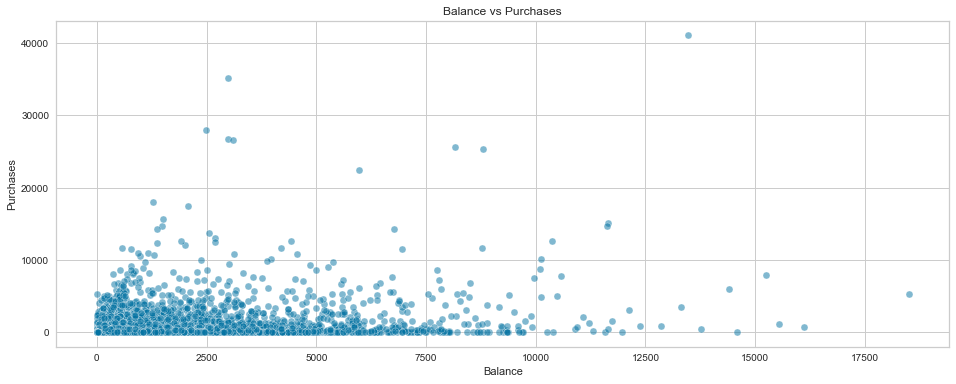

In [9]:
plt.figure(figsize=(16, 6))
plt.title('Balance vs Purchases')
sns.scatterplot(data=data, x='BALANCE', y='PURCHASES', alpha=0.5)
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()

Terlihat bahwa tidak terdapat hubungan antara jumlah saldo yang dimiliki seseorang dengan jumlah pembalian yang dilakukan. Hal ini menunjukan kebanyakan pemilik credit card cenderung hemat dalam berbelanja.

## Balance vs Minimum Payments

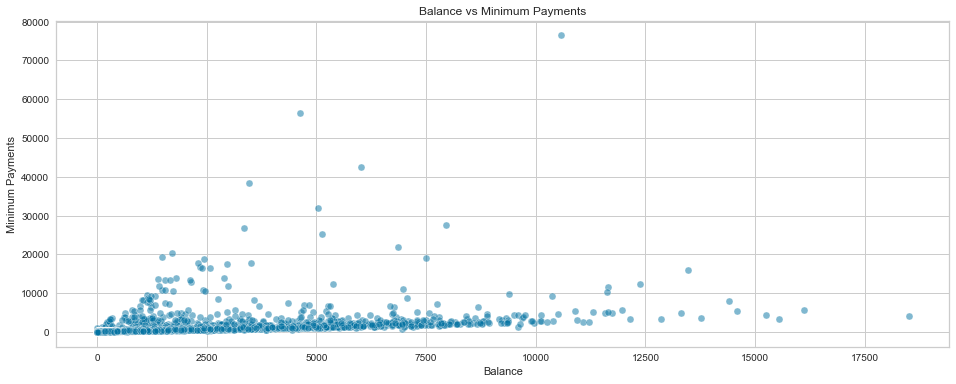

In [10]:
plt.figure(figsize=(16, 6))
plt.title('Balance vs Minimum Payments')
sns.scatterplot(data=data, x='BALANCE', y='MINIMUM_PAYMENTS', alpha=0.5)
plt.xlabel('Balance')
plt.ylabel('Minimum Payments')
plt.show()

Terlihat bahwa semakin besar jumlah saldo yang dimiliki seseorang maka jumlah minimum pembayaran yang dilakukan juga tidak terlalu signifikant meningkat secara umum. Hal ini tentunya mendukung analisis kita terhadap grafik balance vs purchases

## Balance vs Balance Frequncy

In [11]:
px.scatter(data, x='BALANCE', y="BALANCE_FREQUENCY", color="TENURE", title='Balance vs Credit Limit')

Terlihat bahwa seseorang yang sering mengalami perubahan saldo (balance frequency) maka cenderung memiliki jumlah saldo semakin bertambah (balance)

# **5. PREPROCESSING**

## Data Inference

In [12]:
data_inf = data.sample(10, random_state=12)

## Feature Enginering

Setelah mengamati data yang dimiliki, saya memilih untuk melakukan drop terhadap kolom Cust_ID karena menurut pengamatan saya nilainya hanyalah mengidentifikasikan pemegang kartu dan informasinya tidaklah penting untuk proses clustering nanti.

In [13]:
data.drop(columns=['CUST_ID'], inplace=True, axis=1)

## Check Outlier

In [14]:
num_train = data._get_numeric_data() 
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column BALANCE outliers = 8.02%
Column BALANCE_FREQUENCY outliers = 16.72%
Column PURCHASES outliers = 9.47%
Column ONEOFF_PURCHASES outliers = 11.69%
Column INSTALLMENTS_PURCHASES outliers = 9.88%
Column CASH_ADVANCE outliers = 11.26%
Column PURCHASES_FREQUENCY outliers = 0.00%
Column ONEOFF_PURCHASES_FREQUENCY outliers = 12.47%
Column PURCHASES_INSTALLMENTS_FREQUENCY outliers = 0.00%
Column CASH_ADVANCE_FREQUENCY outliers = 3.91%
Column CASH_ADVANCE_TRX outliers = 10.77%
Column PURCHASES_TRX outliers = 9.16%
Column CREDIT_LIMIT outliers = 2.68%
Column PAYMENTS outliers = 9.25%
Column MINIMUM_PAYMENTS outliers = 9.85%
Column PRC_FULL_PAYMENT outliers = 17.81%
Column TENURE outliers = 100.00%


Setelah melakukan analisis terhadap data yang dimiliki, terdapat beberapa kolom yang saya akan handling outliernya menggunakan trimming dengan persentase dibawah 10%, diantaranya ialah : Balance, Purchases, Installments Purchases, Oneoff Purchases Frequency, Cash Advance Frequency, Purchases trx, Credit Limit, dan Payments.

## Handling Outlier

Trimming

In [15]:
max_Balance = data['BALANCE'].quantile(0.95)
min_Balance = data['BALANCE'].quantile(0.05)

max_Purchases = data['PURCHASES'].quantile(0.95)
min_Purchases = data['PURCHASES'].quantile(0.05)

max_Installments_Purchases = data['INSTALLMENTS_PURCHASES'].quantile(0.95)
min_Installments_Purchases = data['INSTALLMENTS_PURCHASES'].quantile(0.05)

max_Oneoff_Purchases_Frequency = data['ONEOFF_PURCHASES_FREQUENCY'].quantile(0.95)
min_Oneoff_Purchases_Frequency = data['ONEOFF_PURCHASES_FREQUENCY'].quantile(0.05)

max_Cash_Advance_Frequency = data['CASH_ADVANCE_FREQUENCY'].quantile(0.95)
min_Cash_Advance_Frequency = data['CASH_ADVANCE_FREQUENCY'].quantile(0.05)

max_Purchases_trx = data['PURCHASES_TRX'].quantile(0.95)
min_Purchases_trx = data['PURCHASES_TRX'].quantile(0.05)

max_Credit_limit = data['CREDIT_LIMIT'].quantile(0.95)
min_Credit_limit = data['CREDIT_LIMIT'].quantile(0.05)

max_Payments = data['PAYMENTS'].quantile(0.95)
min_Payments = data['PAYMENTS'].quantile(0.05)

In [16]:
# Remove Outliers
data = data[(data['BALANCE']<max_Balance) & (data['BALANCE']>min_Balance) & 
            (data['PURCHASES']<max_Purchases) & (data['PURCHASES']>min_Purchases) &
            (data['INSTALLMENTS_PURCHASES']<max_Installments_Purchases) & (data['INSTALLMENTS_PURCHASES']>min_Installments_Purchases) &
            (data['ONEOFF_PURCHASES_FREQUENCY']<max_Oneoff_Purchases_Frequency) & (data['ONEOFF_PURCHASES_FREQUENCY']>min_Oneoff_Purchases_Frequency) &
            (data['CASH_ADVANCE_FREQUENCY']<max_Cash_Advance_Frequency) & (data['CASH_ADVANCE_FREQUENCY']>min_Cash_Advance_Frequency) &
            (data['PURCHASES_TRX']<max_Purchases_trx) & (data['PURCHASES_TRX']>min_Purchases_trx) & 
            (data['CREDIT_LIMIT']<max_Credit_limit) & (data['CREDIT_LIMIT']>min_Credit_limit) &
            (data['PAYMENTS']<max_Payments) & (data['PAYMENTS']>min_Payments)]

## Handling Missing Value

In [17]:
cek = pd.DataFrame(data.isnull().sum(), columns=['No. of missing values'])
cek['% missing_values'] = (cek/len(data)).round(2)*100
cek

,No. of missing values,% missing_values
BALANCE,0,0.0
BALANCE_FREQUENCY,0,0.0
PURCHASES,0,0.0
ONEOFF_PURCHASES,0,0.0
INSTALLMENTS_PURCHASES,0,0.0
CASH_ADVANCE,0,0.0
PURCHASES_FREQUENCY,0,0.0
ONEOFF_PURCHASES_FREQUENCY,0,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0
CASH_ADVANCE_FREQUENCY,0,0.0


Terlihat bahwa data telah bersih dari adanya missing value

## Feature Scaling

In [18]:
data2 = data.copy()
#Scaling
scaler = StandardScaler()
scaler.fit(data2)
scaled_std = pd.DataFrame(scaler.transform(data2),columns= data2.columns )

In [19]:
# Bentuk data setelah di scale
print("Dataframe untuk modeling:")
scaled_std.head()

Dataframe untuk modeling:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.294660,0.329749,-0.979433,-0.595277,-1.047856,-0.321186,-1.818801,-0.247219,-1.580523,0.132884,-0.251562,-1.007666,-0.521148,-0.940056,-0.552341,-0.365271,0.327045
1,-0.804262,0.329749,-0.062105,0.032123,-0.191879,-0.558213,-0.826854,0.893545,-0.749631,0.132884,-0.251562,-0.279408,-1.004876,-0.005200,-0.604438,0.126709,0.327045
2,0.025900,0.329749,-0.427704,0.012374,-0.946482,-0.274629,-0.826854,0.513292,-1.580523,0.132884,0.367477,-0.716363,-0.118041,-0.982916,-0.207638,-0.365271,0.327045
3,2.650412,-1.066967,-0.804772,-0.617962,-0.629688,3.741573,-0.330881,-0.247219,-0.611147,0.132884,2.637288,-0.789189,1.494386,-0.672749,0.821386,-0.365271,-3.023496
4,0.157278,0.329749,-0.565703,-0.236672,-0.797589,-0.205785,0.165092,2.034309,-0.749631,0.132884,-0.457908,-0.206582,-0.722701,-0.488419,-0.355459,-0.365271,0.327045


## Cek Nilai Variance Inflation Factor (VIF)

In [20]:
#Cek Multicollinearity

vif_data2 = pd.DataFrame()
vif_data2["feature"] = data2.columns
  
# calculating VIF for each feature
vif_data2["VIF"] = [variance_inflation_factor(data2.values, i) for i in range(len(data2.columns))]
vif_data2

,feature,VIF
0,BALANCE,8.129101
1,BALANCE_FREQUENCY,110.952400
2,PURCHASES,inf
3,ONEOFF_PURCHASES,inf
4,INSTALLMENTS_PURCHASES,inf
5,CASH_ADVANCE,4.211343
6,PURCHASES_FREQUENCY,72.409807
7,ONEOFF_PURCHASES_FREQUENCY,9.114788
8,PURCHASES_INSTALLMENTS_FREQUENCY,38.799823
9,CASH_ADVANCE_FREQUENCY,9.464626


- Ada 7 feature yang tidak saling berkaitan dengan feature lainnya yaitu Purchases, Oneoff_purchases, installments_purchases, cash_advance, payments, minimum_payments dan prc_full_payment.
- Dapat diprediksi bahwa jika dilakukan reduksi dimensi, maka paling tidak dapat direduksi menjadi 10 dimensi

## Cek Cummulative EVR

In [21]:
pca_scaled=PCA(n_components=7).fit(data2)
pca_scaled.explained_variance_ratio_

array([0.528268  , 0.16984097, 0.11265774, 0.09318261, 0.05880935,
       0.02470427, 0.01252953])

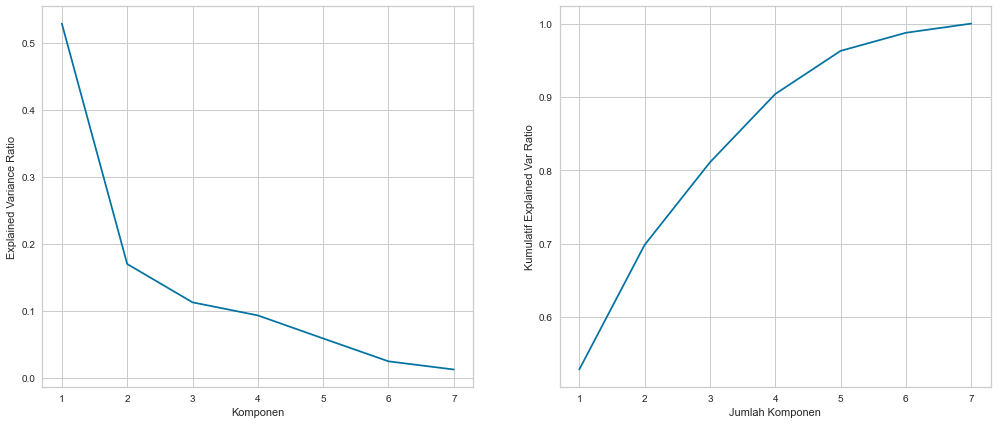

In [22]:
fig,ax=plt.subplots(ncols=2,figsize=(17,7))
ax[0].plot(range(1,8),pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,8),np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

In [23]:
pca_coba=PCA(n_components=0.8)
pca_coba.fit(data2)

PCA(n_components=0.8)

In [24]:
pca_coba.n_components_

3

Nampak ada patahan di 3 komponen, dengan cumsum EVR 0.8. kemungkinan 3 komponen merupakan jumlah terbaik dengan cumsum EVR sekitar 80%.

# **6. DIMENSIONALITY REDUCTION**

In [25]:
#Melakukan reduksi dimensi menggunakan PCA 
pca = PCA(n_components=2)
pca.fit(scaled_std)
data_reduction = pd.DataFrame(pca.transform(scaled_std), columns=(["column1","column2"]))
data_reduction.describe().T

,count,mean,std,min,25%,50%,75%,max
column1,251.0,4.953983e-17,2.026868,-3.647365,-1.565308,-0.295054,1.227513,5.844694
column2,251.0,1.848897e-16,1.714462,-3.865034,-1.207553,-0.341536,0.953616,5.702601


In [26]:
data.shape      # size data sebelum dilakukan dimensi reduksi, terlihat masih berjumlah 17 columns

(251, 17)

In [27]:
data_reduction.shape    # size data setelah dilakukan dimensi reduksi, terlihat telah berkurang menjadi 2

(251, 2)

Terlihat bahwa dimensi dari data telah berkurang yang sebelumnya 17 telah menjadi 2

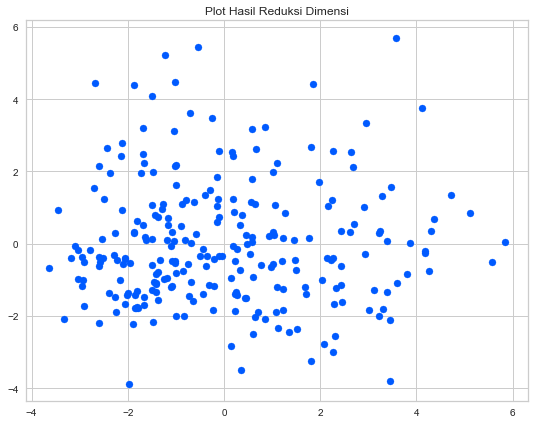

In [28]:
# Plot kedalam grafik
x =data_reduction["column1"]
y =data_reduction["column2"]
#To plot
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="#005aff", marker="o" )
ax.set_title("Plot Hasil Reduksi Dimensi")
plt.show()

# **7. TUNING**

In [29]:
# K-Means
def train_kmeans(k,data_reduction):
  kmeans_model = KMeans(n_clusters=k)
  y_pred = kmeans_model.fit_predict(data_reduction)
  print("K-Means Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(data_reduction,y_pred) )

# Spectral clustering
def train_spectral(k,data_reduction):
  spectral_model = SpectralClustering(n_clusters=k)
  y_pred = spectral_model.fit_predict(data_reduction)
  print("Spectral Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(data_reduction,y_pred) )

# Agglomerative clustering
def train_Agglomerative(k,data_reduction):
  agglo_model = AgglomerativeClustering(n_clusters=k)
  y_pred = agglo_model.fit_predict(data_reduction)
  print("Agglomerative Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(data_reduction,y_pred) )

## K-Means

Elbow Method


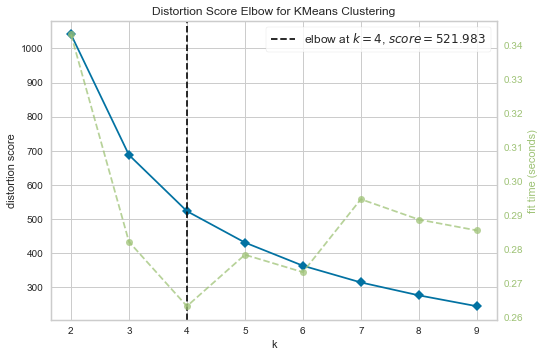

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Menggunakan elbow method
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=9)
Elbow_M.fit(data_reduction)
Elbow_M.show()

Berdasarkan elbow method diperoleh jumlah cluster terbaik adalah 4

In [31]:
# Menggunakan Shiluete Score
clusters=[3,4,5,6]
for i in clusters:
  train_kmeans(i,data_reduction)


K-Means Clustering : clusters :  3  silhouette_score :  0.400024300034819
K-Means Clustering : clusters :  4  silhouette_score :  0.3856883943697933
K-Means Clustering : clusters :  5  silhouette_score :  0.3539335543479641
K-Means Clustering : clusters :  6  silhouette_score :  0.36130860946434845


Berdasarkan nilai shilluet score menggunakan K-Measn diperoleh nilai cluster terbaik adalah 3

## Visualisai

In [32]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_reduction)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [33]:
silhouette_scores = [silhouette_score(data_reduction, model.labels_)
                     for model in kmeans_per_k[1:]]

Saving figure silhouette_analysis_plot


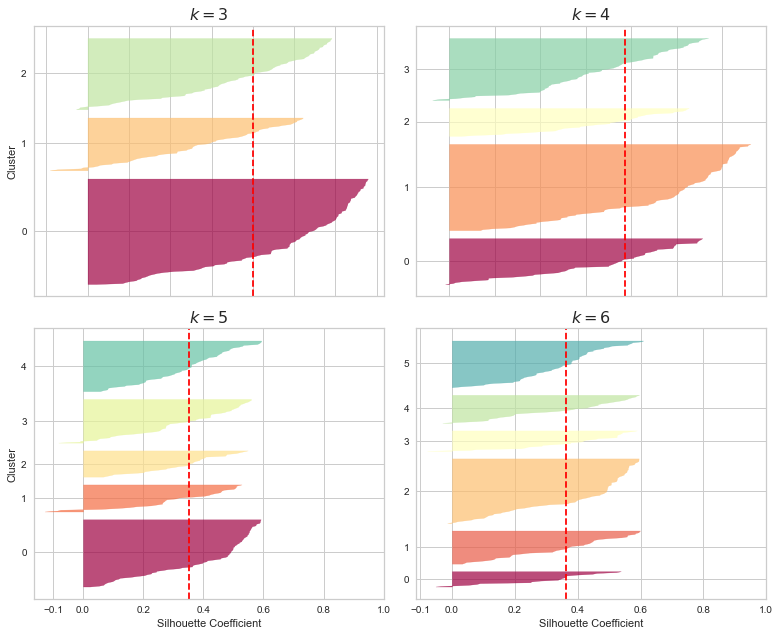

In [34]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_reduction, y_pred)

    padding = len(data_reduction) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

Berdasarakan pengamatan visualisasi, maka saya memutuhsakan untuk mengambil jumlah cluster sebanyak 3. Karena proprosei pembagiannya lebih seimbang dibandingkan dengan jumlah cluster yang lain.

## Spectral Cluster

In [35]:
clusters=[3,4,5,6]
for i in clusters:
  train_spectral(i,data_reduction)

Spectral Clustering : clusters :  3  silhouette_score :  0.36026596432310376
Spectral Clustering : clusters :  4  silhouette_score :  0.2923871023981701
Spectral Clustering : clusters :  5  silhouette_score :  0.32123873177309886
Spectral Clustering : clusters :  6  silhouette_score :  0.2538850051514131


Berdasarkan nilai shilluet score menggunakan Spectral Cluster diperoleh nilai cluster terbaik adalah 3

## Agglomerative Clustering

In [36]:
clusters=[3,4,5,6]
for i in clusters:
    train_Agglomerative(i,data_reduction)

Agglomerative Clustering : clusters :  3  silhouette_score :  0.3021042261003801
Agglomerative Clustering : clusters :  4  silhouette_score :  0.3038663948218034
Agglomerative Clustering : clusters :  5  silhouette_score :  0.338092785350322
Agglomerative Clustering : clusters :  6  silhouette_score :  0.30025409637102396


Berdasarkan nilai shilluet score menggunakan Agglomerative clustering diperoleh nilai cluster terbaik adalah 5

# **8. MODEL**

## K-Means

In [37]:
# Elbow Method
model_kMeans_elbow = KMeans(3)
y_pred_kMeans_elbow = model_kMeans_elbow.fit_predict(data_reduction)

In [38]:
data_reduction["Cluster"] = y_pred_kMeans_elbow
data["Cluster"] = y_pred_kMeans_elbow

In [39]:
y_pred_kMeans_elbow

array([1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1])

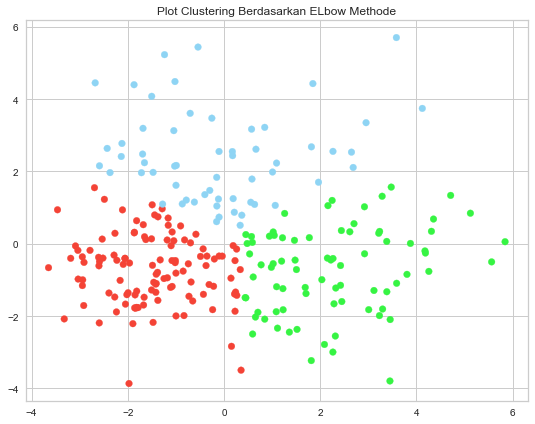

In [40]:
cmap = colors.ListedColormap(["#8ed4f4", "#060708", "#F44336","#36f443"])
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111, label='tes')
ax.scatter(x,y,s=45, c=y_pred_kMeans_elbow, marker='o', cmap=cmap)
ax.set_title("Plot Clustering Berdasarkan ELbow Methode")
plt.show()

## Spectral Clustering

In [41]:
model_spectral = SpectralClustering(n_clusters=3)
y_pred_spectral = model_spectral.fit_predict(data_reduction)

In [42]:
data_reduction["Cluster"] = y_pred_spectral
data["Cluster"] = y_pred_spectral

In [43]:
y_pred_spectral

array([2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2])

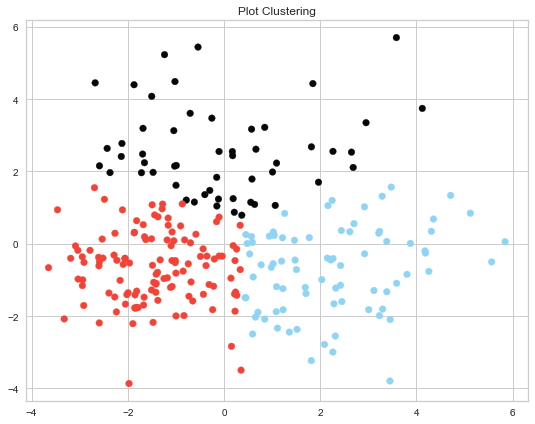

In [44]:
cmap = colors.ListedColormap(["#8ed4f4", "#060708", "#F44336"])
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111, label='tes')
ax.scatter(x,y,s=45, c=y_pred_spectral, marker='o', cmap=cmap)
ax.set_title("Plot Clustering")
plt.show()

## Algomerative Clustering

In [45]:
model_algomerative = SpectralClustering(n_clusters=5)
y_pred_algomerative = model_algomerative.fit_predict(data_reduction)

In [46]:
data_reduction["Cluster"] = y_pred_algomerative
data["Cluster"] = y_pred_algomerative

In [47]:
y_pred_algomerative

array([0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 3, 3, 0, 4, 0, 4, 0, 4, 0, 0, 0, 4,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 1, 2, 4, 3, 0, 4, 4, 0, 2, 0, 2,
       4, 0, 4, 4, 3, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 2, 1, 0,
       4, 3, 2, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 3, 3, 0, 4, 4, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 0, 0, 3, 4, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 0, 3,
       0, 0, 4, 0, 0, 0, 0, 0, 1, 4, 4, 0, 0, 3, 0, 4, 2, 0, 1, 0, 4, 4,
       2, 4, 4, 4, 0, 4, 4, 0, 0])

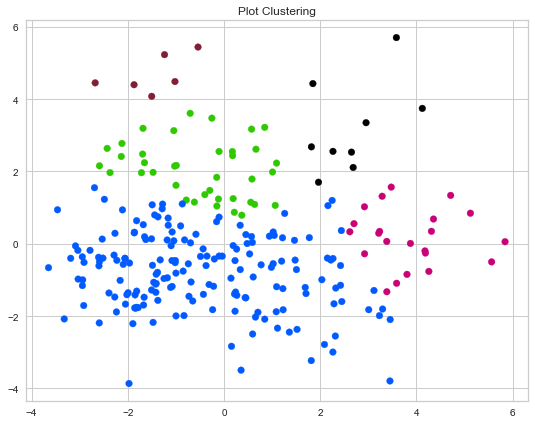

In [48]:
cmap = colors.ListedColormap(["#005aff", "#821d33", "#ffa500", "#000000", "#c90076", "#2ec900"])
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111, label='tes')
ax.scatter(x,y,s=45, c=y_pred_algomerative, marker='o', cmap=cmap)
ax.set_title("Plot Clustering")
plt.show()

# Analisis Perbandingan Nilai Cluster

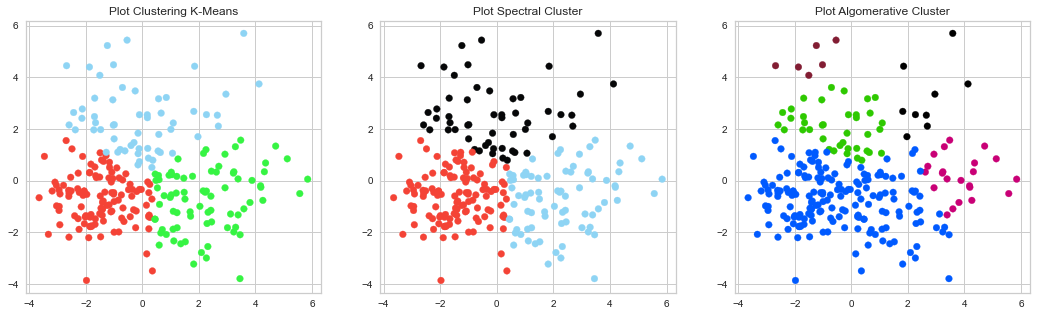

In [49]:
fig, ax = plt.subplots(ncols=3,figsize=(18,5))

# K-Means

cmap = colors.ListedColormap(["#8ed4f4", "#060708", "#F44336","#36f443"])
#ax[0] = plt.subplot(121, label='tes')
ax[0].scatter(x,y,s=45, c=y_pred_kMeans_elbow, marker='o', cmap=cmap)
ax[0].set_title("Plot Clustering K-Means")

# Spectral CLuster

cmap = colors.ListedColormap(["#8ed4f4", "#060708", "#F44336"])
#ax[1] = plt.subplot(122, label='tes')
ax[1].scatter(x,y,s=45, c=y_pred_spectral, marker='o', cmap=cmap)
ax[1].set_title("Plot Spectral Cluster")

# Algomerative Cluster

cmap = colors.ListedColormap(["#005aff", "#821d33", "#ffa500", "#000000", "#c90076", "#2ec900"])
#ax[2] = plt.subplot(123, label='tes')
ax[2].scatter(x,y,s=45, c=y_pred_algomerative, marker='o', cmap=cmap)
ax[2].set_title("Plot Algomerative Cluster")
plt.show()

Berdasarkan ilustrasi nilai cluster, maka saya memilih menggunakan jumlah cluster sebanyak 3 karena membagi data dengan baik dibandingkan yang jumlah cluster 5 

# **9. EVALUASI MODEL**

In [50]:
data["Cluster"] = y_pred_kMeans_elbow
data_reduction["Cluster"] = y_pred_kMeans_elbow

## Melihat Persentase Cluster

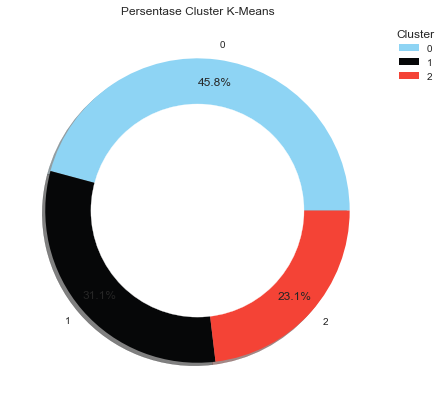

In [51]:
warna = ["#8ed4f4","#060708","#F44336","#36f443"]
sizes = dict(data["Cluster"].value_counts())

plt.figure(figsize=(10, 7))
plt.title("Persentase Cluster K-Means")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors = warna)
plt.legend(title="Cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


Berdasarakan visualisasi cluster, diperoleh persentase dari tiap cluster ialah : 

Cluster 0 : 45.8%, Cluster 1 : 31.1% dan Cluster 2 : 23.1%

## Purchases vs Oneoff Purchases

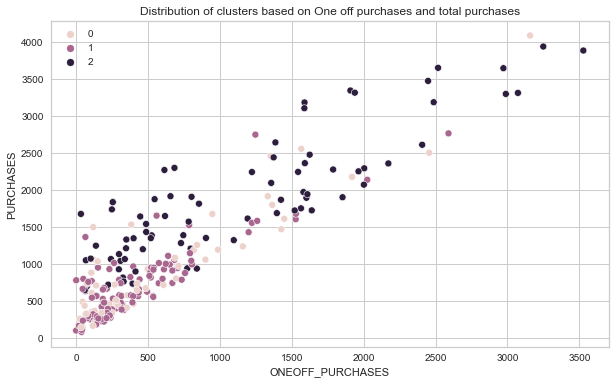

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data2, x='ONEOFF_PURCHASES', y='PURCHASES', hue=y_pred_kMeans_elbow)
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

Berdasarakan grafik diatas, maka kita dapat membuat pengelompokan cluster berikut :

Cluster 0 : Rata-rata pembelian maksimum

Cluster 1 : Rata-rata pembelian sedang

Cluster 2 : Rata-rata pembelian minimum


## Purchases

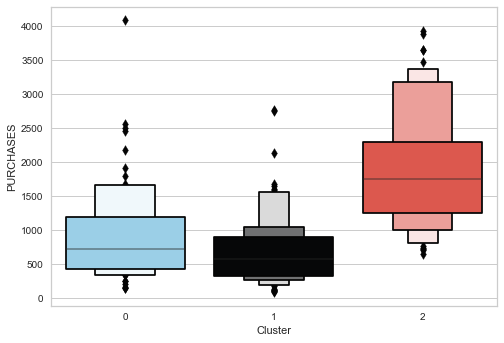

In [53]:
plt.figure()
grafik2=sns.boxenplot(x=data["Cluster"], y=data["PURCHASES"], palette=warna)
plt.show()

Terlihat bahwa cluster 0 merupakan orang-orang yang sering melakukan pembelian menggunakan kartu credit, kemudian disusul oleh cluster 2 dan 1 

## Minimum Payments

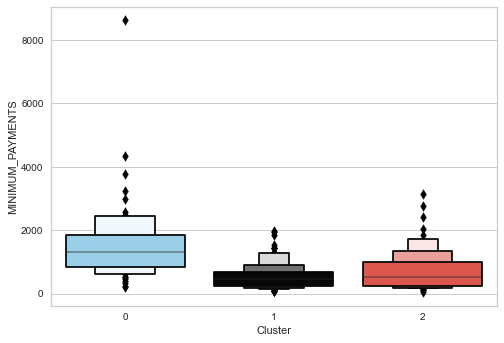

In [54]:
plt.figure()
grafik3=sns.boxenplot(x=data["Cluster"], y=data["MINIMUM_PAYMENTS"], palette=warna)
plt.show()

Berdasarakan pembayaran minimum, terlihat bahwa cluster 2 adalah yang tertinggi kemudian disusul oleh cluster 0 dan 1

## Balance

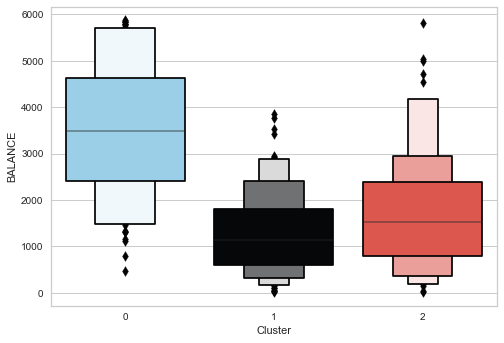

In [55]:
plt.figure()
grafik3=sns.boxenplot(x=data["Cluster"], y=data["BALANCE"], palette=warna)
plt.show()

Berdasarakan jumlah saldo untuk melakukan pembelian, terlihat bahwa cluster 2 adalah yang tertinggi kemudian disusul oleh cluater 0 dan 1

## Save Model

In [56]:
with open('model_kMeans_elbow.pkl', 'wb') as file_1:
    pickle.dump(model_kMeans_elbow, file_1)

# **10. MODEL INFERENCE**

## Load Model

In [57]:
with open('model_kMeans_elbow.pkl', 'rb') as file_1:
    model_kMeans_elbow = pickle.load(file_1)

In [58]:
# Menampilkan data_inf 
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2987,3905,1434.097191,1.000000,0.00,0.00,0.00,1866.841949,0.000000,0.000000,0.000000,0.083333,2,0,2400.0,2361.929133,390.202217,0.000000,12
3190,2053,61.154350,0.818182,791.67,214.00,577.67,19.841346,1.000000,0.166667,1.000000,0.083333,1,50,1000.0,941.784130,131.473679,0.090909,12
339,55,886.657470,1.000000,1440.48,1440.48,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,13,1800.0,309.644014,291.857209,0.000000,12
2822,509,4556.537803,0.909091,1450.00,1450.00,0.00,2260.735690,0.090909,0.090909,0.000000,0.181818,2,1,9000.0,1010.845518,917.567262,0.000000,11
1850,6255,8.844399,0.181818,116.68,0.00,116.68,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,3000.0,677.982898,123.107146,0.666667,12
1435,4565,138.537976,0.333333,987.45,987.45,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,12,3000.0,0.000000,NaN,0.000000,6
2734,461,7302.672686,1.000000,0.00,0.00,0.00,10762.707760,0.000000,0.000000,0.000000,0.750000,19,0,9000.0,3824.308564,2214.506825,0.000000,12
639,3491,1654.369427,1.000000,736.24,480.00,256.24,0.000000,1.000000,0.166667,0.916667,0.000000,0,20,7000.0,2267.012612,518.201767,0.083333,12
4032,8507,544.314078,1.000000,111.80,111.80,0.00,912.814627,0.083333,0.083333,0.000000,0.166667,3,1,1200.0,135.415952,183.945301,0.000000,12
4232,2157,2822.483318,1.000000,1203.05,780.13,422.92,3521.075329,0.583333,0.500000,0.166667,0.583333,10,16,8500.0,4359.919494,624.012723,0.083333,12


In [59]:
# Drop kolom cust_id
data_inf.drop(columns=['CUST_ID'],axis=1, inplace=True)

In [60]:
# Handling Missing valuw
misval = data_inf.dropna()
data_inf = misval

In [61]:
# Scaling
data_inf_scaled = pd.DataFrame(scaler.transform(data_inf),columns=data_inf.columns)

In [62]:
# Reduksi dimensi dengan PCA
pca_data_inf = PCA(n_components=2)
pca_data_inf.fit_transform(scaled_std)
pca_std = pd.DataFrame(pca_data_inf.transform(data_inf_scaled), columns=(['Column1','Column2']))
pca_std.describe().T

,count,mean,std,min,25%,50%,75%,max
Column1,9.0,-1.677923,2.184509,-4.051257,-3.945519,-1.977985,0.444351,0.970914
Column2,9.0,0.123750,3.900960,-3.959754,-2.208006,-1.171436,1.547874,8.821875


In [63]:
# Melakukan prediksi menggunakan model terbaik
prediksi = model_kMeans_elbow.predict(pca_std)
prediksi

array([1, 2, 2, 0, 1, 0, 2, 1, 0])

# **10. KESIMPULAN**

## EDA

- Semakin besar jumlah saldo untuk pembelian (balance) maka batasan kartu kredit akan semakin meningkat (credit limit)
- Terlihat bahwa tidak terdapat hubungan antara jumlah saldo yang dimiliki seseorang dengan jumlah pembalian yang dilakukan. Hal ini menunjukan kebanyakan pemilik credit card cenderung hemat dalam berbelanja.
- Terlihat bahwa semakin besar jumlah saldo yang dimiliki seseorang maka jumlah minimum pembayaran yang dilakukan juga tidak terlalu signifikant meningkat secara umum. Hal ini tentunya mendukung analisis kita terhadap grafik balance vs purchases
- Terlihat bahwa seseorang yang sering mengalami perubahan saldo (balance frequency) maka cenderung memiliki jumlah saldo semakin bertambah (balance)

## Cluster

Cluster 0 : Tipe Star
- Merupakan cluster mayoritas dengan proporsi sebanyak 45.8%
- Tipe high purchases, artinya jumlah pembelian yang dilakukan besar
- Tipe midle minimum pyments, artinya jumlah pembayaran sedang
- Tipe midle balance, artinya jumlah saldo sedang


Cluster 1 : Tipe Cloud
- Merupakan cluster sedang dengan proporsi sebesar 31.1%
- Tipe low purchases, artinya jumlah pembelian yang dilakukan kecil
- Tipe low minimum pyments, artinya jumlah pembayaran kecil
- Tipe low balance, artinya jumlah saldo kecil

Cluster 2 : Tipe Wind
- Merupakan cluster minoritas dengan proporsi sebesar 23.1%
- Tipe midle purchases, artinga jumlah pembelian yang dilakukan sedang
- Tipe hight minimum pyments, artinya jumlah pembayaran besar
- Tipe hignt balance, artinya jumlah saldo besar

Berdasrakn informasi diatas, maka saya dapat menyimpulkan ialah :

Cluster 0 : Berisi tipe orang yang boros dan jumlah saldo yang sedang

Cluster 1 : Berisi tipe orang yang hemat dan jumlah saldo yang kecil

Cluster 2 : Berisi tipe orang yang hemat dan jumlah saldo yang besar

## Conceptual Problem

----

Jawab pertanyaan berikut:

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

Answere :
1. Inertia adalah radius untuk melakukan efaluasi model. Biasanya inertia yang baik ialah yang nilainya besar dan mirip

2. Elbow Method adalah salah satu teknik yang dapat digunakan untuk membantu memutuskan barapa banyak jumlah cluster (k) yang akan digunakan. Adapun keleman Elbow method menurut pandangan saya berdasarkan project ini ialah, Elbow method bukanlah menunjukan ketetapan jumlah cluster yang sudah paling baik, namun kita harus melakukan pegamatan kembali terhadap plot grafiknya. Karena menggunakan elbow method plot yang diberikan hanyalah garis patahan bukan berdasrakan plot sebaran datanya untuk mengambil keputusan.

3. Berdasrakan pengamatan pribadi, saya menarik informasi berikut :

- K-Means cocok digunakan untuk data yang memiliki sebarannya melingkar namun kurang baik untuk data yang sebarannya memanjang.

- Spectral Clustering cocok digunakan untuk data yang memiliki sebaran memanjang dan juga membentuk lingkaran

- Algomerative clustering cocok digunakan untuk data yang sebaran yang besar namun kurang baik jika digunakan untuk data yang memiliki sebaran yang rapat, serta baik juga digunakan untuk data yang sebarannya melingkar
